In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [46]:
dataset = pd.read_excel("../data/acp_data.xls",sheet_name=0,header=0,index_col=0)

In [93]:
indSupp = pd.DataFrame(np.array([[2664,136,472,177,1410,180 ],
                                 [1288,74,414,157,915,160]]),
                        columns=['CYL', 'PUISS', 'LONG','LARG','POIDS','V-MAX'],
                      index = ['Peugeot 604', 'Peugeot 304 S'])

In [94]:
indSupp.head(5)

,CYL,PUISS,LONG,LARG,POIDS,V-MAX
Peugeot 604,2664,136,472,177,1410,180
Peugeot 304 S,1288,74,414,157,915,160


In [48]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, Alfasud TI to Lada-1300
Data columns (total 9 columns):
CYL            18 non-null int64
PUISS          18 non-null int64
LONG           18 non-null int64
LARG           18 non-null int64
POIDS          18 non-null int64
V-MAX          18 non-null int64
FINITION       18 non-null object
PRIX           18 non-null int64
R-POID.PUIS    18 non-null float64
dtypes: float64(1), int64(7), object(1)
memory usage: 1.4+ KB


In [49]:
dataset.dtypes

CYL              int64
PUISS            int64
LONG             int64
LARG             int64
POIDS            int64
V-MAX            int64
FINITION        object
PRIX             int64
R-POID.PUIS    float64
dtype: object

In [50]:
dataset.shape

(18, 9)

In [51]:
#nombre d'observations
dataset.shape[0]

18

In [52]:
#nombre de variables
dataset.shape[1]

9

# PREPROCESSING

In [53]:
#instanciation
sc = StandardScaler()

In [19]:
# dataset_v2 = pd.concat([dataset, pd.get_dummies(dataset['FINITION'])], axis=1);

In [54]:
dataset= dataset.drop(['FINITION', 'PRIX', 'R-POID.PUIS'], axis=1)

In [57]:
#transformation–centrage-réduction
Z = sc.fit_transform(dataset)
print(Z)

[[-0.77509889 -0.28335818 -1.88508077 -1.09734528 -1.56900676  0.56976043]
 [-0.12016326  0.01963869  1.60580955  2.0010414   0.23416142  0.14597168]
 [-0.92920139 -0.83885242 -0.44217944  0.25819889 -0.21663062 -0.53209032]
 [-1.12733318 -1.29334771 -1.00072189 -1.09734528 -1.11821472 -0.61684807]
 [-0.12841875  0.67613189  0.25599862 -0.51639778  0.19659542  0.56976043]
 [-0.9209459  -0.13185975 -0.20945342  0.45184806  0.0087654   0.14597168]
 [ 0.45221746 -0.28335818  0.72145067  0.45184806  0.60982146 -0.36257482]
 [-0.18345536 -1.49534562 -0.44217944 -0.71004695 -0.51715865 -1.54918332]
 [ 2.84080623  2.19111619  0.86108628  1.22644473  1.81193359  1.84112668]
 [-1.28143568 -1.49534562 -1.60580955 -1.87194195 -1.98223281 -1.54918332]
 [-0.16969621  1.23162613 -0.25599862 -0.90369611 -0.14149861  1.41733793]
 [ 0.45772112 -0.13185975  0.53526985  1.03279556  0.60982146 -0.02354382]
 [ 1.0080872   1.53462299  1.65235475  0.45184806  2.18759363  0.14597168]
 [ 0.99432805  0.67613189

In [58]:
#Moyenne
print(np.mean(Z,axis=0))

[-2.22044605e-16 -1.41861831e-16  0.00000000e+00  1.86270752e-15
  5.73615229e-16  5.55111512e-16]


In [59]:
#Écart types
print(np.std(Z,axis=0,ddof=0))

[1. 1. 1. 1. 1. 1.]


# ACP

In [60]:
acp = PCA(svd_solver='full')

In [61]:
#affichage des paramètres
print(acp)

PCA(svd_solver='full')


In [62]:
coord = acp.fit_transform(Z)

In [63]:
#nombre de composantes calculées
print(acp.n_components_) # 6

6


In [64]:
#variance expliquée
print(acp.explained_variance_)

[4.68090853 0.90641889 0.39501114 0.22650574 0.09826011 0.04583676]


In [66]:
#valeur corrigéeei
n= dataset.shape[0]

eigval = (n-1)/n*acp.explained_variance_
print(eigval)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [33]:
#ou bien en passant par les valeurs singulières
print(acp.singular_values_**2/n)

[4.42085806 0.85606229 0.37306608 0.21392209 0.09280121 0.04329027]


In [34]:
#proportion de variance expliquée
print(acp.explained_variance_ratio_)

[0.73680968 0.14267705 0.06217768 0.03565368 0.01546687 0.00721505]


In [67]:
p = dataset.shape[1]

# Éboulis des valeurs propres

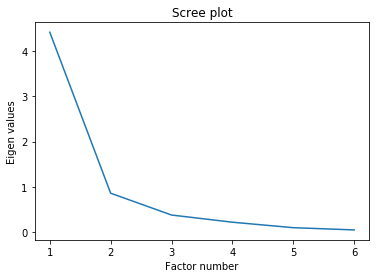

In [68]:
#scree plot
plt.plot(np.arange(1,p+1),eigval)
plt.title("Scree plot")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.show()

# Variance expliquée vs. Nombre de facteurs

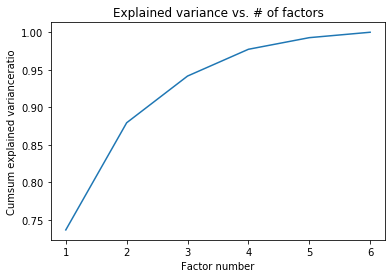

In [69]:
#cumul de variance expliquée
plt.plot(np.arange(1,p+1),np.cumsum(acp.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained varianceratio")
plt.xlabel("Factor number")
plt.show()

In [70]:
#seuils pour test des bâtons brisés
bs = 1/np.arange(p,0,-1)
bs = np.cumsum(bs)
bs = bs[::-1]

In [71]:
#test des bâtons brisés
print(pd.DataFrame({'Val.Propre':eigval,'Seuils':bs}))

   Val.Propre    Seuils
0    4.420858  2.450000
1    0.856062  1.450000
2    0.373066  0.950000
3    0.213922  0.616667
4    0.092801  0.366667
5    0.043290  0.166667


# Représentation des individus dans le premier plan factoriel

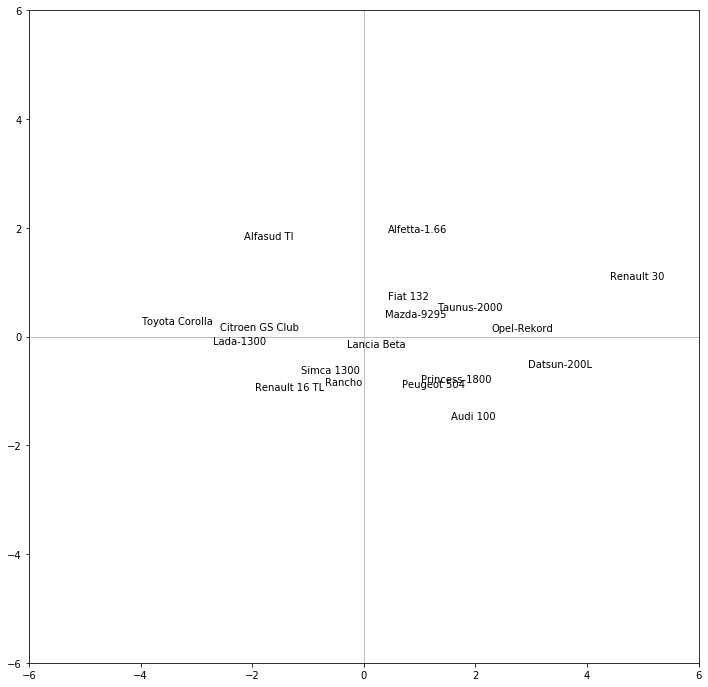

In [72]:

#positionnement des individus dans lepremier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6) 
#même limites en abscisse
axes.set_ylim(-6,6) 
#et en ordonnée#placement des étiquettes des observations
for i in range(n):plt.annotate(dataset.index[i],(coord[i,0],coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

In [75]:
#contribution des individus dans l'inertie totale
di = np.sum(Z**2,axis=1)
print(pd.DataFrame({'ID':dataset.index,'d_i':di}))

                 ID        d_i
0        Alfasud TI   8.225176
1          Audi 100   6.673755
2        Simca 1300   2.159327
3   Citroen GS Club   6.780145
4          Fiat 132   1.169124
5       Lancia Beta   1.134950
6       Peugeot 504   1.512793
7     Renault 16 TL   5.636826
8        Renault 30  21.789657
9    Toyota Corolla  16.290143
10     Alfetta-1.66   4.456770
11    Princess-1800   1.952513
12      Datsun-200L  11.112624
13      Taunus-2000   2.452986
14           Rancho   1.963373
15       Mazda-9295   0.684521
16      Opel-Rekord   6.083119
17        Lada-1300   7.922198


In [78]:
#contributions aux axes
ctr = coord**2
for j in range(p):ctr[:,j] = ctr[:,j]/(n*eigval[j])
print(pd.DataFrame({'id':dataset.index,'CTR_1':ctr[:,0],'CTR_2':ctr[:,1]}))

                 id     CTR_1     CTR_2
0        Alfasud TI  0.057493  0.206933
1          Audi 100  0.030640  0.151329
2        Simca 1300  0.015746  0.029525
3   Citroen GS Club  0.083244  0.000827
4          Fiat 132  0.002300  0.031398
5       Lancia Beta  0.001163  0.002497
6       Peugeot 504  0.005878  0.056499
7     Renault 16 TL  0.047711  0.062384
8        Renault 30  0.244369  0.073419
9    Toyota Corolla  0.199640  0.003622
10     Alfetta-1.66  0.002407  0.237357
11    Princess-1800  0.013028  0.045978
12      Datsun-200L  0.108701  0.020292
13      Taunus-2000  0.021727  0.015361
14           Rancho  0.006002  0.052300
15       Mazda-9295  0.001870  0.008233
16      Opel-Rekord  0.065888  0.000707
17        Lada-1300  0.092194  0.001340


In [83]:
#racine carrée des valeurs propres
sqrt_eigval = np.sqrt(eigval)
#corrélation des variables avec les axes
corvar = np.zeros((p,p))
for k in range(p):corvar[:,k] = acp.components_[k,:] * sqrt_eigval[k]
#afficher la matrice des corrélations variables x facteurs    
print(corvar)

[[ 0.89346354  0.1149061  -0.21598347  0.37361508  0.04617627 -0.01225391]
 [ 0.88685803  0.38468911 -0.11294784 -0.16548492 -0.08948124 -0.13171084]
 [ 0.88615477 -0.38102873  0.04131023 -0.12939024  0.22255537 -0.03959265]
 [ 0.81353638 -0.4127359   0.36944822  0.09785447 -0.14567244 -0.0227967 ]
 [ 0.90518746 -0.22453248 -0.29586489 -0.13954667 -0.09277852  0.12084561]
 [ 0.75471037  0.57351941  0.29652226 -0.03402937  0.05747056  0.09540146]]


In [84]:
#on affiche pour les deux premiers axes
print(pd.DataFrame({'id':dataset.columns,'COR_1':corvar[:,0],'COR_2':corvar[:,1]}))

      id     COR_1     COR_2
0    CYL  0.893464  0.114906
1  PUISS  0.886858  0.384689
2   LONG  0.886155 -0.381029
3   LARG  0.813536 -0.412736
4  POIDS  0.905187 -0.224532
5  V-MAX  0.754710  0.573519


# Cercle des corrélations

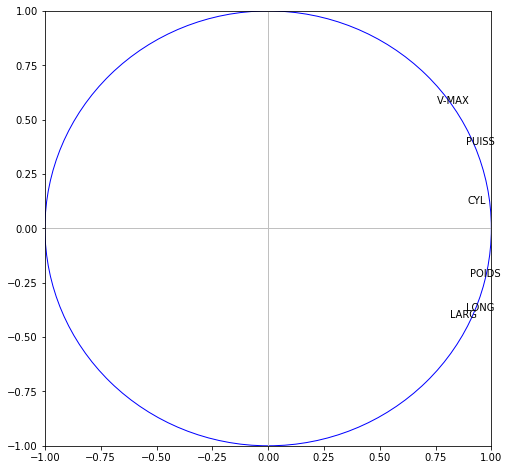

In [87]:
#cercle des corrélations
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)#affichage des étiquettes (noms des variables)
for j in range(p):plt.annotate(dataset.columns[j],(corvar[j,0],corvar[j,1]))
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1);
#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)#affichage
plt.show()

On perçoit clairement l’effet taille sur le premier axe: les voitures puissantes et rapides sont aussi  les  plus  lourdes  et imposantes,  la  relation  globale  entre  les  variables esten  réalité déterminée par la cylindrée (CYL).

# Traitement des individus et variables illustratifs

In [95]:
#centrage-réduction avec les paramètres des individus actifs
ZIndSupp = sc.transform(indSupp)
print(ZIndSupp)

[[ 2.84080623  2.59511201  1.79199036  2.0010414   2.48812166  1.84112668]
 [-0.94571238 -0.53585556 -0.90763148 -1.87194195 -1.23091273  0.14597168]]


In [96]:
#projection dans l'espace factoriel
coordSupp = acp.transform(ZIndSupp)
print(coordSupp)

[[ 5.56329226  0.33860928 -0.46428878  0.40214608 -0.38981076 -0.08102064]
 [-2.21224139  1.25777905 -0.09304388 -0.35370189  0.648528    0.12473042]]


# Positionnement des individus supplémentaires dans le premier plan factoriel

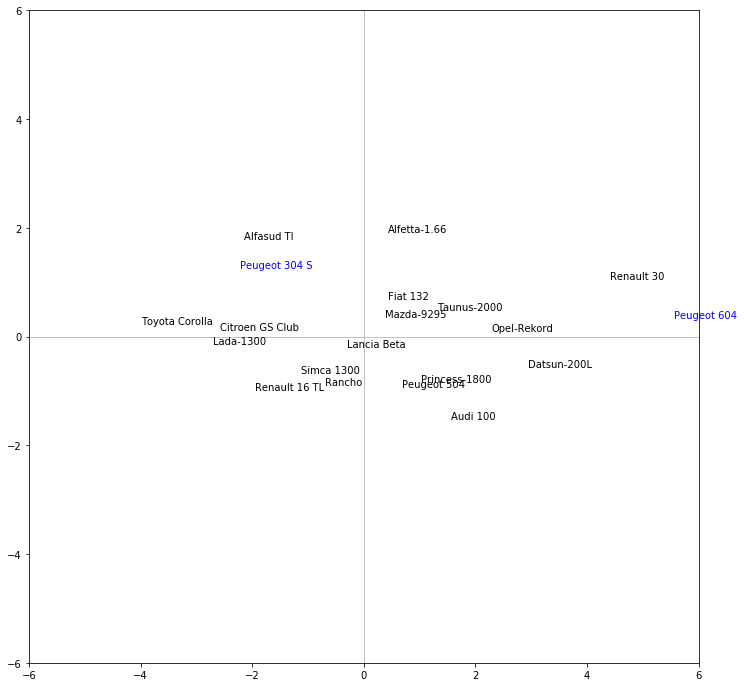

In [100]:
#positionnement des individus supplémentaires dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)#étiquette des points actifs
for i in range(n):plt.annotate(dataset.index[i],(coord[i,0],coord[i,1]))#étiquette des points supplémentaires (illustratifs)en bleu ‘b’
for i in range(coordSupp.shape[0]):plt.annotate(indSupp.index[i],(coordSupp[i,0],coordSupp[i,1]),color='b')#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)#affichage
plt.show()

# Ajout de variable quantitative

In [102]:
df = pd.read_excel("../data/acp_data.xls", sheet_name = 0, header = 0, index_col = 0)

In [103]:
df.columns

Index(['CYL', 'PUISS', 'LONG', 'LARG', 'POIDS', 'V-MAX', 'FINITION', 'PRIX',
       'R-POID.PUIS'],
      dtype='object')

In [104]:
varSupp =df[['PRIX','R-POID.PUIS']]

In [105]:
#Nous récupérons ces variables quantitatives dans une structure à part
vsQuanti = varSupp.iloc[:,:2].values
print(vsQuanti)

[[3.05700000e+04 1.10126582e+01]
 [3.99900000e+04 1.30588235e+01]
 [2.96000000e+04 1.54411765e+01]
 [2.82500000e+04 1.57627119e+01]
 [3.49000000e+04 1.12755102e+01]
 [3.54800000e+04 1.31707317e+01]
 [3.23000000e+04 1.46835443e+01]
 [3.20000000e+04 1.83636364e+01]
 [4.77000000e+04 1.03125000e+01]
 [2.65400000e+04 1.48181818e+01]
 [4.23950000e+04 9.72477064e+00]
 [3.39900000e+04 1.41463415e+01]
 [4.39800000e+04 1.19130435e+01]
 [3.50100000e+04 1.10204082e+01]
 [3.94500000e+04 1.41125000e+01]
 [2.79000000e+04 1.31927711e+01]
 [3.27000000e+04 1.12000000e+01]
 [2.21000000e+04 1.40441176e+01]]


In [106]:
#corrélation avec les axes factoriels
corSupp = np.zeros((vsQuanti.shape[1],p))
for k in range(p):
    for j in range(vsQuanti.shape[1]):
        corSupp[j,k] = np.corrcoef(vsQuanti[:,j],coord[:,k])[0,1]

#affichage des corrélations avec les axes
print(corSupp)

[[ 0.77247524  0.08670844 -0.13389277 -0.22582891 -0.15944978 -0.10254878]
 [-0.58903888 -0.67254512 -0.15017616  0.21365718  0.10162791  0.28999742]]


# Cercle des corrélations incluant les variables illustratives

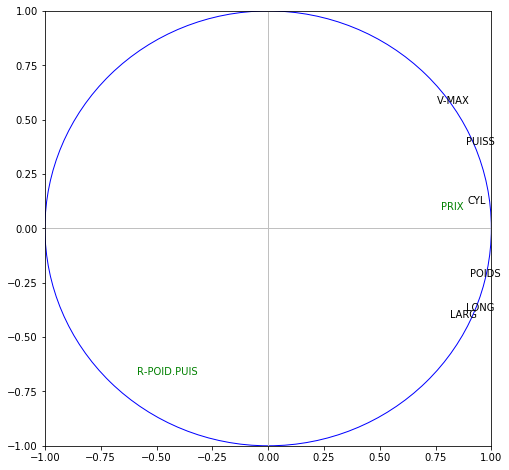

In [107]:
#cercle des corrélations avec les var. supp
fig, axes = plt.subplots(figsize=(8,8))
axes.set_xlim(-1,1)
axes.set_ylim(-1,1)

#variables actives
for j in range(p):
    plt.annotate(dataset.columns[j],(corvar[j,0],corvar[j,1]))

#variables illustratives
for j in range(vsQuanti.shape[1]):
    plt.annotate(varSupp.columns[j],(corSupp[j,0],corSupp[j,1]),color='g')
    
#ajouter les axes
plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)

#ajouter un cercle
cercle = plt.Circle((0,0),1,color='blue',fill=False)
axes.add_artist(cercle)

#affichage
plt.show()

# Ajout de variable qualitative

In [108]:
#traitement de var. quali supplémentaire
vsQuali = df['FINITION']

In [109]:
#modalités de la variable qualitative
modalites = np.unique(vsQuali)
print(modalites)

['B' 'M' 'TB']


# Figure 10-Individus selon le type de finition {1_M : rouge, 2_B : vert, 3_TB : bleu}

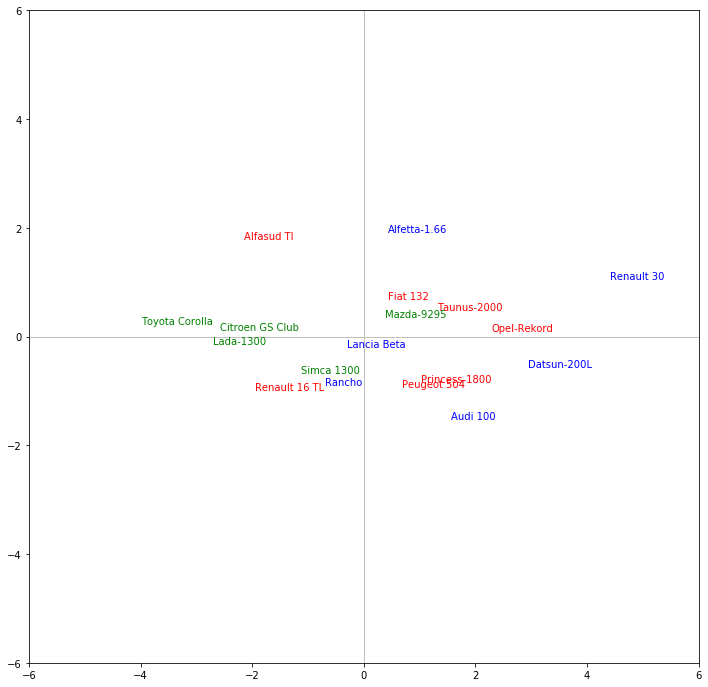

In [111]:
#liste des couleurs
couleurs = ['r','g','b']

#faire un graphique en coloriant les points
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-6,6)
axes.set_ylim(-6,6)

#pour chaque modalité de la var. illustrative
for c in range(len(modalites)):
    #numéro des individus concernés
    numero = np.where(vsQuali == modalites[c])
    
    #les passer en revue pour affichage
    for i in numero[0]:plt.annotate(dataset.index[i],(coord[i,0],coord[i,1]),color=couleurs[c])
        
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)

#affichage
plt.show()